# ICE-5 Machine learning with image features

## (Tutorial) Image Gradients
The difference in value between neighboring pixels is called an image gradient.<br>
We'll learn how to compute the image gradients with the following codes

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import data, color, exposure
import cv2

In [20]:
# load image and turn it into grayscale
image = color.rgb2gray(data.retina())

In [21]:
### Compute the horizontal gradient using the centered 1D filter.
### This is equivalent to replacing each non-border pixel with the
### difference between its right and left neighbors. The leftmost
### and rightmost edges have a gradient of 0.
gx = np.empty(image.shape, dtype=np.double)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]

In [22]:
### Same deal for the vertical gradient
gy = np.empty(image.shape, dtype=np.double)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]

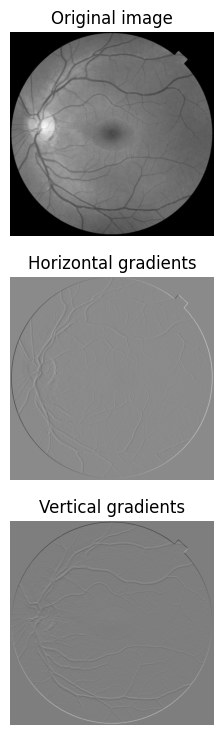

In [23]:
### Matplotlib incantations
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 9), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.set_adjustable('box')
ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal gradients')
ax2.set_adjustable('box')
ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('Vertical gradients')
ax3.set_adjustable('box')

## Task 1. Design your code to compute diagonal gradient of the image used in the example and visualize it

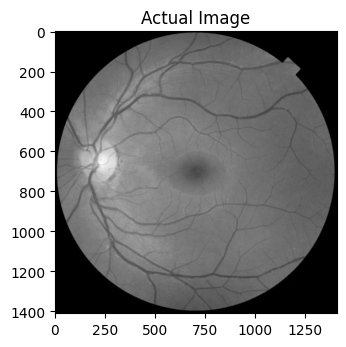

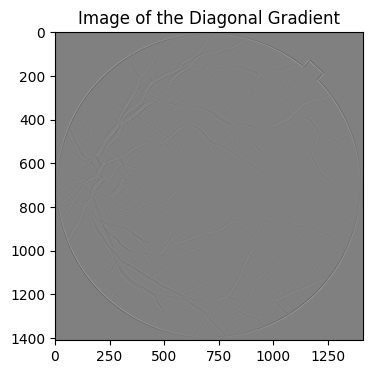

In [24]:
# load image and turn it into grayscale
image = color.rgb2gray(data.retina())
# Designing the code to compute diagonal gradient
Diag_grad = cv2.Sobel(image, cv2.CV_64F, 1, 1)
# range values from 0 to 255
Diag_standard = cv2.normalize(Diag_grad, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# Displaying the results
plt.figure(figsize=(8, 4))
# Actual image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Actual Image")
plt.show()
# Diagonal gradient of the image
plt.figure(figsize=(8, 4))
plt.imshow(Diag_standard, cmap='gray')
plt.title("Image of the Diagonal Gradient")
plt.show()

## **Question 1**. Explain why we don't directly use the simplest image features (color or number of pixels)

**Answer to Q1**:
As we know that some of the images are complex , so detecting the patterns from these type of images we need more features. Simply we can't use color or number of pixels. Color feature alone may not be efficient for classifying between the objects. At the same we can't rely on number of pixels also. These feature don't provide underlying structures , textures and pattern. And also lack of sufficient information about spatial arrangement and relationship between different regions in the image.



---

## (Tutorial) HOG image features

In [25]:
# read image and convert it to grayscale
image = color.rgb2gray(data.chelsea())
# extract HOG features from the input image with predefined parameters
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

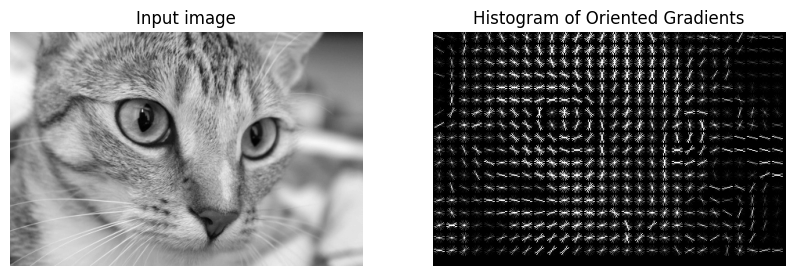

In [26]:
# visualize the original image and the hog features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_adjustable('box')

## Task 2. ORB keypoints extraction and visualization
Apart from HOG image features, another popular image feature is ORB.<br>
Please extract keypoints from the image used in HOG example using on ORB features and visualize the keypoints on the original image

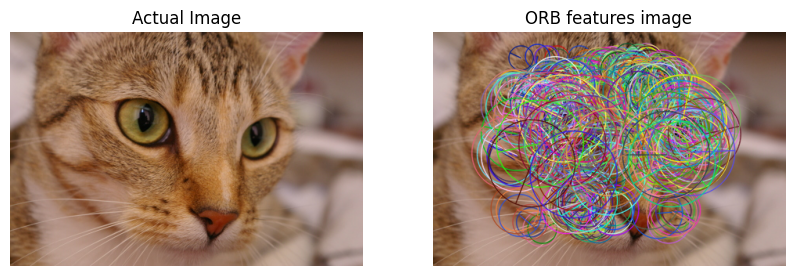

In [27]:
import cv2
import matplotlib.pyplot as plt
from skimage import data

# color image for the ORB features
ImageC = data.chelsea()

# creation of the ORB module
ORB_de = cv2.ORB_create()

# keypoints and descriptors generated by ORB detector module
KiPoints, Dskptors = ORB_de.detectAndCompute(ImageC, None)

# extracting keypoints of the actual image
ImageKipoints = cv2.drawKeypoints(ImageC, KiPoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# showing the original image with keypoints
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.imshow(ImageC)
ax1.set_title('Actual Image')
ax1.axis('off')

ax2.imshow(ImageKipoints)
ax2.set_title('ORB features image')
ax2.axis('off')

plt.show()


## (Tutorial) Bag-of-Visual-Words
In the tutorial code, we create the code words only based on one image

In [28]:
# defining feature extractor that we want to use (ORB feature used in this extractor)
def features(image):
    extractor = cv2.ORB_create()
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints, descriptors

In [29]:
# builing visual words histogram based on the descriptors of the image and the clustering algorithm
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [30]:
# Clustring the bag-of-visual-words by Kmeans method
from sklearn.cluster import KMeans
img = data.chelsea()
kmeans = KMeans(n_clusters = 30)
kp, descriptor_list = features(img)
kmeans.fit(descriptor_list)
images = []
images.append(img)
preprocessed_image = []
for image in images:
      # image = gray(image)
      keypoint, descriptor = features(image)
      if (descriptor is not None):
          histogram = build_histogram(descriptor, kmeans)
          preprocessed_image.append(histogram)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'The histogram of visual words')

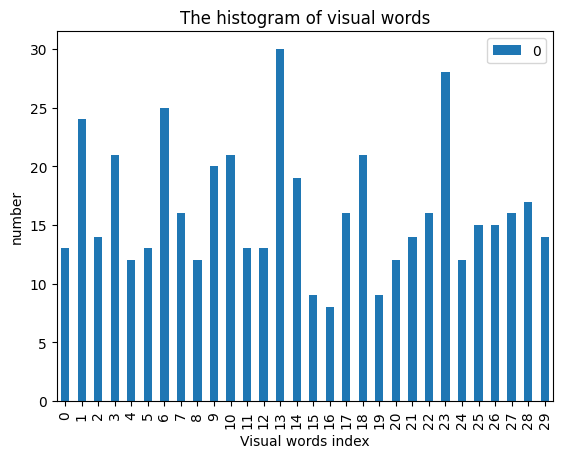

In [31]:
import pandas as pd
df = pd.DataFrame(preprocessed_image[0])
df.plot.bar()
#plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Visual words index')
plt.ylabel('number')
plt.title('The histogram of visual words')

## Task 3. Bag-of-Visual-Words for multiple images
Create your bag-of-visual-words with 10 images and visualize the histogram of visual words. The 10 images belong to one category(dog, cat, bike, etc.)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


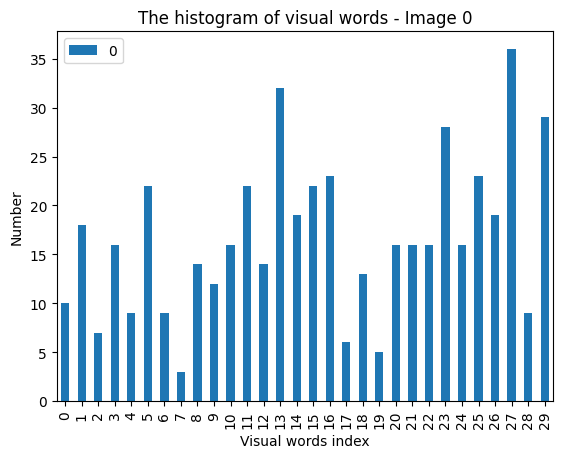

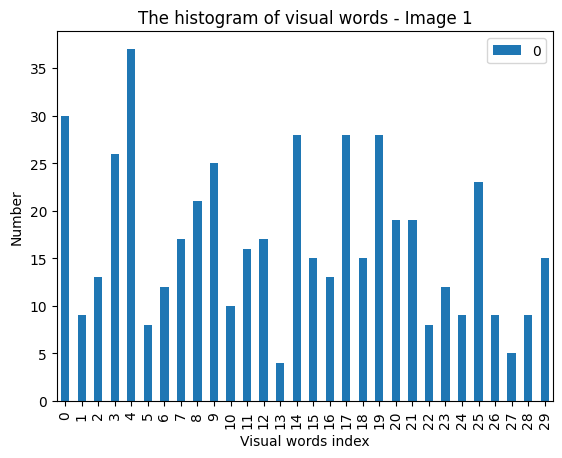

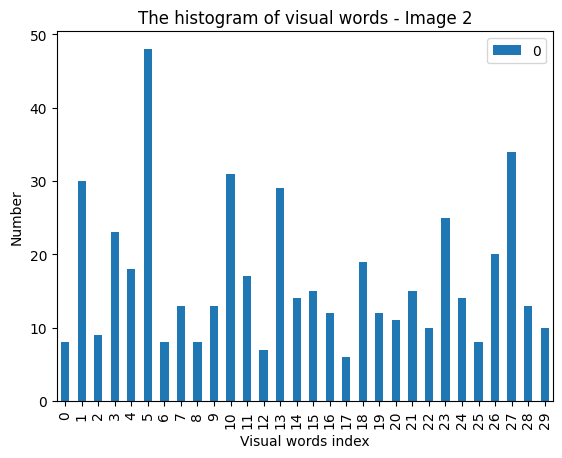

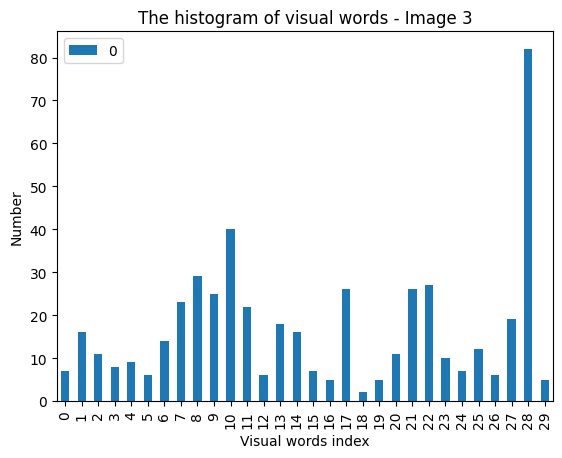

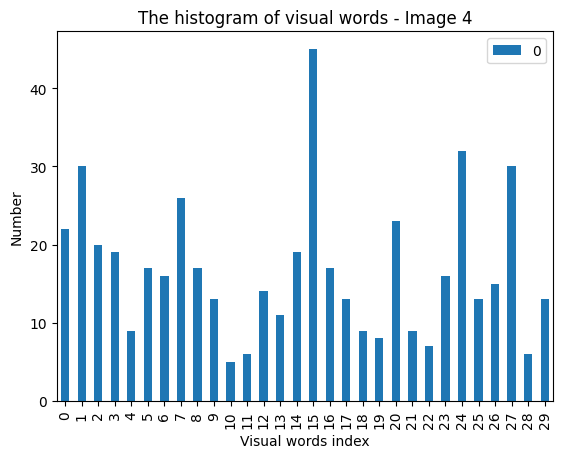

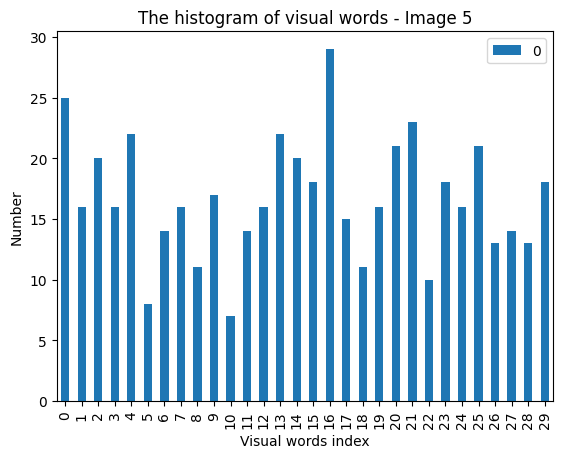

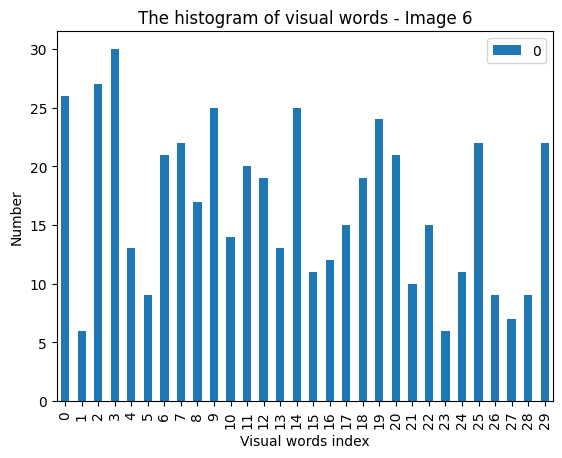

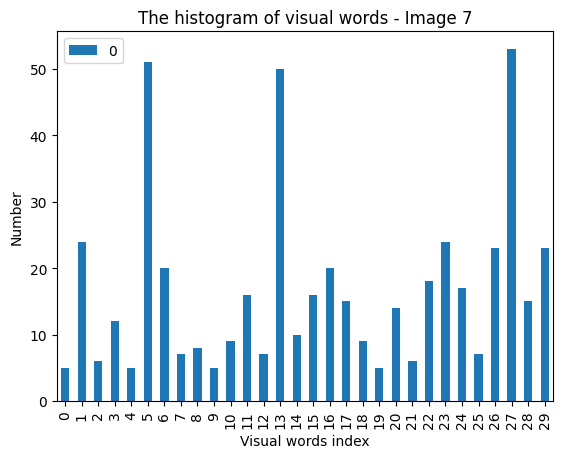

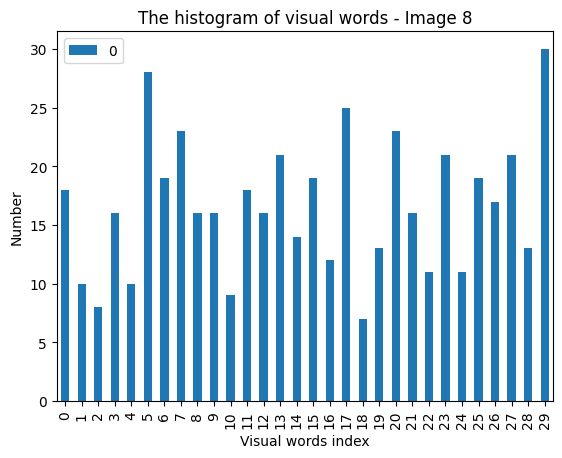

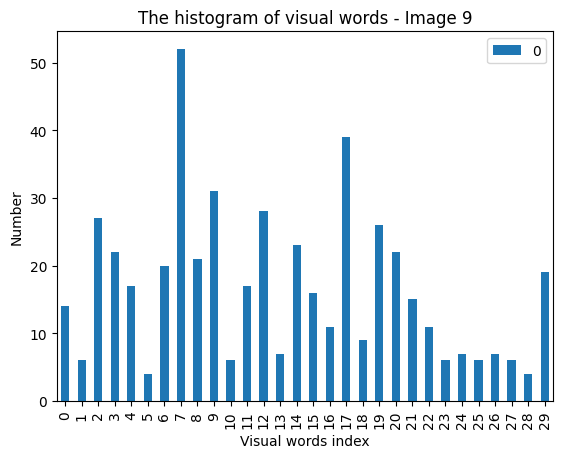

In [32]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import glob
import numpy as np

# Define the feature extractor function
def features(image):
    extractor = cv2.ORB_create()
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints, descriptors

# Define the histogram builder function
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result = cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

# 10 image paths of cat
catimpaths = ["/content/Acat1.jpg","/content/Acat2.jpg","/content/Acat3.jpg","/content/Acat4.jpg",
    "/content/Acat5.jpg","/content/Acat6.jpg","/content/Acat7.jpg","/content/Acat8.jpg","/content/Acat9.jpg",
    "/content/Acat10.jpg"]

# reading the images using opencv
images = []
for catim_path in catimpaths:
    Image = cv2.imread(catim_path)
    images.append(Image)

# Perform feature extraction and build histograms
descriptor_list = []
for image in images:
    keypoints, descriptors = features(image)
    if descriptors is not None:
        descriptor_list.extend(descriptors)

descriptor_list = np.array(descriptor_list)
kmeans = KMeans(n_clusters=30)
kmeans.fit(descriptor_list)

preprocessed_images = []
for image in images:
    keypoints, descriptors = features(image)
    if descriptors is not None:
        histogram = build_histogram(descriptors, kmeans)
        preprocessed_images.append(histogram)
# Visual words histograms
for i in range(len(preprocessed_images)):
    df = pd.DataFrame(preprocessed_images[i])
    df.plot.bar()
    plt.xlabel('Visual words index')
    plt.ylabel('Number')
    plt.title('The histogram of visual words - Image {}'.format(i))
    plt.show()

## Question 2. Recall that the feature scaling does not have a large effect on classification accuracy (tf-idf). How about the effect of feature scaling in Bag-of-Visual-Words? Explain it.

**Answer to Q2**:
Feature scaling plays significant role in Bag of visual words . Feature scaling makes all the features in similar range or scale.
Without normalization , features with higher range of values may dominate clustering method as well as classification process.
We should maintain the balanced features so we can get effective clustering or classification.
Ultimately it makes the model robust to make the decisions.Clustering means grouping the objects based on similar characteristics so if the features have different scale , it would converges slowly or get stuck with features.
Using this scaling we can generalize well on the features. It helps to eliminate the bias from the features. We can reduce noise using feature scaling.

---

## Question 3. What is the advantage of ORB(Oriented FAST and Rotated Brief) over SURF (Speeded up robust features). Explain briefly (Minimum of 10 words and maximum of 150 words)

**Answer to Q3**:
Firstly ORB is open source library available in openCv package. Developers can develop the applications and readily available.Most of the developers like because implementation is fast and efficient while SURF is slow and complex. As we learned from the above task we can take descriptors, keypoints, and matching points for the images. Both ORB and SURF scale-invariant , we can achieve by sing pyramid scale space.
ORB can reduce the memory size and faster matching . Speed of the ORB is high compared to the SURF .ORB is freely available for commercial and non-commercial use. We can get reliable performance using ORB. It can perform with reliable dataset.


## Task 4. Extract text from image
Image file is given along with ICE-5-2.ipynb in canvas assignment .

Save it in drive and use get shareable link to everyone option . Image file name is **ExtractText4.jpeg**

Please extract the image from image file and print the text that you extracted.

In [33]:
# Installing easyocr package for extracting text from image
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import easyocr

# Mentioning the easyocr reader language (english)
EngReader = easyocr.Reader(['en'])

# Loading the image
Ocrtext = EngReader.readtext('/content/ExtractText4.jpeg')

# text from the image
image_Text = ""
for Dete in Ocrtext:
    image_Text += Dete[1] + " "

# Displaying the text
print("Text extracted from the image :\n")
print(image_Text)

Text extracted from the image :

Education is the passport to the future, for tomorrow belongs to those who prepare for it today: Malcolm X 


## Task 5. Design code to implement **ORB** using **OpenCV**. Please use a face image (Preferably your face image as its unique).

Keep your face image file name as **faceimg.jpg**
Save it in drive and use get shareable link to everyone option.

Please print the following during the implementation

* Training image and Testing image

* Number of Keypoints Detected In The Training Image (Not just number image too)

* Number of Keypoints Detected In The Query Image (Not just number image too)

* Number of Matching Keypoints Between The Training and Query Images (Not just number image too)



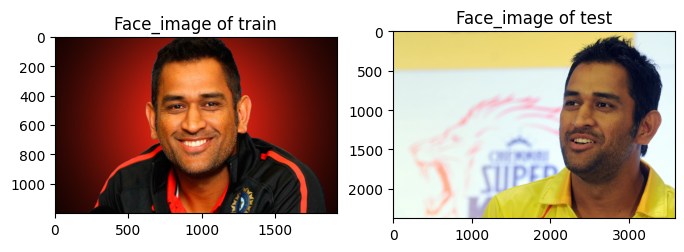

Key Points in train image: 500
Key points in test : 500
Matching points 134


In [36]:
import cv2
import matplotlib.pyplot as plt

# Reading the face images (train and test)
Train = cv2.imread('/content/faceimage.jpg', cv2.IMREAD_COLOR)
Test= cv2.imread('/content/faceim2.jpg', cv2.IMREAD_COLOR)

# defining orb creator
ORB_det = cv2.ORB_create()

# keypoints and descriptions for train and test
Tr_kipts, Tr_deskr = ORB_det.detectAndCompute(Train, None)
Tst_kipts, Tst_deskr = ORB_det.detectAndCompute(Test, None)

# Define Bfmatcher
Bfma = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# matching using bfmatcher
Mats = Bfma.match(Tr_deskr, Tst_deskr)
Mats = sorted(Mats, key=lambda x: x.distance)

# Display the images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(Train, cv2.COLOR_BGR2RGB))
plt.title("Face_image of train")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(Test, cv2.COLOR_BGR2RGB))
plt.title("Face_image of test")

plt.show()

# Number of keypoints in train and test
print("Key Points in train image:", len(Tr_kipts))
print("Key points in test :", len(Tst_kipts))

# Matching points between train and test
print("Matching points", len(Mats))


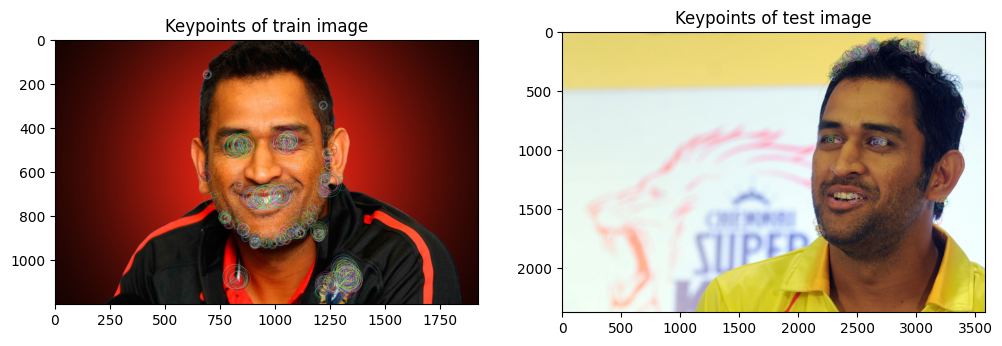

In [37]:
# Visualization of keypoints (train and test)
Tr_image = cv2.drawKeypoints(Train, Tr_kipts, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
Tst_image = cv2.drawKeypoints(Test, Tst_kipts, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Displaying the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(Tr_image, cv2.COLOR_BGR2RGB))
plt.title("Keypoints of train image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(Tst_image, cv2.COLOR_BGR2RGB))
plt.title("Keypoints of test image")

plt.show()